# Statistical Analysis - Result


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from lifelines import KaplanMeierFitter

### Data Processing
Read all nescessary data for statistical analysis.

In [6]:
# read all nescessary data
path = 'C:\\Users\\Elly\\Dropbox\\Biotronik\\data\\200603 C1503 BIOSOLVE-IV - csv datasets'
# read enrolment details
enrol = pd.read_csv('{}/{}.csv'.format(path, "ENROL"))
# read medical history and risk factors
mhrf = pd.read_csv('{}/{}.csv'.format(path, "MHRF"))
# read ischemic status pre-procedure
isbp = pd.read_csv('{}/{}.csv'.format(path, "ISBP"))
# read procudure information
proc = pd.read_csv('{}/{}.csv'.format(path, "PROC"))
# read lesion characterisation and procedure details
lc = pd.read_csv('{}/{}.csv'.format(path, "LC"))
# read pre-dilatation balloon details
prebn = pd.read_csv('{}/{}.csv'.format(path, "PREBN"))
# read magmaris details
device = pd.read_csv('{}/{}.csv'.format(path, "DEVICE"))
# read post-dilatation balloon details
postbn = pd.read_csv('{}/{}.csv'.format(path, "POSTBN"))
# read adverse document documentation
ae_data = pd.read_csv('{}/{}.csv'.format(path, "AE"))
# read ischemic status post-procedure
ispp = pd.read_csv('{}/{}.csv'.format(path, "ISPP"))
# read hospital discharge details
dis = pd.read_csv('{}/{}.csv'.format(path, "DIS"))

## Baseline Clinical and Lesion$^a$ Characteristics
Data are shown as mean ${\pm}$ SD or n (\%). $^a$ per site assessment

In [4]:
patient_count = len(set(enrol["subjid"]))
print("Patients, n = {0}".format(patient_count))
patients = pd.DataFrame(columns=["result"])
print("{0} ({1})".format(len(enrol.sex.loc[enrol.sex == "Male"]), 100*(len(enrol.sex.loc[enrol.sex == "Male"])/patient_count)))
patients.loc["Mean age, years"] = "{0} ± {1}".format(np.mean(enrol["age"]), np.std(enrol["age"]))
patients.loc["Male"] = "{0} ({1})".format(len(enrol[(enrol.sex == "Male")]), 100*(len(enrol[(enrol.sex == "Male")])/patient_count))
patients.loc["Hypertension"] =  "{0} ({1})".format(len(mhrf[(mhrf.mhhypten == "Yes")]), 
                                                   100*(len(mhrf[(mhrf.mhhypten == "Yes")])/patient_count))
patients.loc["Diabetis"] = "{0} ({1})".format(len(mhrf[(mhrf.mhdiabet == "Insulin dependent") | (mhrf.mhdiabet == "Non-insulin dependent")]), 
                                          100*(len(mhrf[(mhrf.mhdiabet == "Insulin dependent") | (mhrf.mhdiabet == "Non-insulin dependent")])/patient_count))
patients.loc["Insulin dependent"] = "{0} ({1})".format(len(mhrf[(mhrf.mhdiabet == "Insulin dependent")]), 
                                          100*(len(mhrf[(mhrf.mhdiabet == "Insulin dependent")])/patient_count))
patients.loc["History of MI"] = "{0} ({1})".format(len(mhrf[(mhrf.mhmi == "Yes")]), 
                                          100*(len(mhrf[(mhrf.mhmi == "Yes")])/patient_count))
patients.loc["Number of MI"] = "{0} ± {1}".format(np.mean(mhrf["mhminum"]), np.std(mhrf["mhminum"]))
patients.loc["History of stroke/TIA"] = "{0} ({1})".format(len(mhrf[(mhrf.mhtia == "Yes")]), 
                                          100*(len(mhrf[(mhrf.mhtia == "Yes")])/patient_count))
patients.loc["Cancer"] = "{0} ({1})".format(len(mhrf[(mhrf.mhcancer == "Yes")]), 
                                          100*(len(mhrf[(mhrf.mhcancer == "Yes")])/patient_count))

patients.loc["Patients with 2 de novo lesions"] = "{0} ({1})".format(len(lc["subjid"]) - len(set(lc["subjid"])), 
                                          100*((len(lc["subjid"]) - len(set(lc["subjid"])))/patient_count))
patients.loc["Indication"] = None
patients.loc["Unstable angina"] = "{0} ({1})".format(len(isbp[isbp["iscs"] == "Unstable angina"]),
                                                      100*(len(isbp[isbp["iscs"] == "Unstable angina"])/patient_count))
patients.loc["NSTEMI"] = "{0} ({1})".format(len(isbp[isbp["isstemi"] == "NSTEMI"]),
                                            100*(len(isbp[isbp["isstemi"] == "NSTEMI"])/patient_count))
patients.loc["STEMI"] = "{0} ({1})".format(len(isbp[isbp["isstemi"] == "STEMI"]),
                                                  100*(len(isbp[isbp["isstemi"] == "STEMI"])/patient_count))
patients.loc["Stable angina"] = "{0} ({1})".format(len(isbp[isbp["iscs"] == "Stable angina"])
                                                   ,100*(len(isbp[isbp["iscs"] == "Stable angina"])/patient_count))
patients.loc["Silent ischemia"] = "{0} ({1})".format(len(isbp[isbp["iscs"] == "Documented silent ischemia"]),
                                                     100*(len(isbp[isbp["iscs"] == "Documented silent ischemia"])/patient_count))
patients

Patients, n = 1985
1480 (74.55919395465995)


,result
"Mean age, years",61.74307304785894 ± 10.499825289524251
Male,1480 (74.55919395465995)
Hypertension,1301 (65.54156171284635)
Diabetis,417 (21.007556675062972)
Insulin dependent,83 (4.181360201511335)
History of MI,418 (21.05793450881612)
Number of MI,1.0741626794258374 ± 0.2963128960863483
History of stroke/TIA,68 (3.425692695214106)
Cancer,132 (6.649874055415617)
Patients with 2 de novo lesions,81 (4.080604534005038)


Stable angina = Angina pectoris: is the medical term for chest pain or discomfort due to coronary heart disease.  It occurs when the heart muscle doesn't get as much blood as it needs. This usually happens because one or more of the heart's arteries is narrowed or blocked, also called ischemia.[ https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4653970/ ].
Unstable angina = acute coronary syndrome: causes unexpected chest pain, and usually occurs while resting. Reduced blood flow to the heart muscle due to narrowed coronary arteries by fatty buildups (atherosclerosis) is the most common cause. They can rupture causing injury to the coronary blood vessel resulting in blood clotting which blocks the flow of blood to the heart muscle. It should be treated as an emergency. A consequence out of it can be a heart attack which increases the risk for severe cardiac arrhythmias or cardiac arrest, which could lead to sudden death.  [ https://www.ncbi.nlm.nih.gov/books/NBK442000/ ].
silent ischemia: Cardiac ischemia refers to lack of blood flow and oxygen to the heart muscle. In most cases, a temporary blood shortage to the heart causes the pain of angina pectoris. But in other cases, there is no pain. These cases are called silent ischemia [ https://www.ncbi.nlm.nih.gov/books/NBK536915/ ].
STEMI: An acute ST-elevation myocardial infarction (STEMI) is an event in which transmural myocardial ischemia results in myocardial injury or necrosis [ https://pubmed.ncbi.nlm.nih.gov/10987628/, https://www.ncbi.nlm.nih.gov/books/NBK532281/ ]. The major risk factors for ST-elevation myocardial infarction are dyslipidemia, diabetes mellitus, hypertension, smoking, and family history of coronary artery disease.[https://pubmed.ncbi.nlm.nih.gov/7946184/, https://pubmed.ncbi.nlm.nih.gov/22089719/ ]. Per definition it is a myocardial infarction, in which there are visible ST elevations in the ECG. If you do not see any ST elevations, there is an NSTEMI.
NESTEMI: A non-ST elevation infarction, NSTEMI for short, is a myocardial infarction in which there are no longer persistent ST elevations, i.e. the typical infarct signs, on the ECG [https://www.ncbi.nlm.nih.gov/books/NBK513228/]. 

In [5]:
lesion_count = len(lc["subjid"])
print("Lesions, n = {0}".format(lesion_count))
lesions = pd.DataFrame(columns=["result"])
lesions.loc["Lesion length, mm"] = "{0} ± {1}".format(np.mean(lc["lclenv"]), np.std(lc["lclenv"]))
lesions.loc["Reference vessel diameter, mm"] = "{0} ± {1}".format(np.mean(lc["lcrvdv"]), np.std(lc["lcrvdv"]))
lesions.loc["Diameter Stenosis pre-procedure, %"] = "{0} ± {1}".format(np.mean(lc["lcdsv"]), np.std(lc["lcdsv"]))
lesions.loc["Calcification None/Moderate"] =  "{0} ({1})".format(len(lc[(lc.lccalccs == "None") | (lc.lccalccs == "Mild")]), 
                                          100*(len(lc[(lc.lccalccs == "None") | (lc.lccalccs == "Mild")])/lesion_count))
lesions.loc["AHA/ACC classification type B2/C"] = "{0} ({1})".format(len(lc[(lc.lcaccaha == "Type B2") | (lc.lcaccaha == "Type C")]), 
                                          100*(len(lc[(lc.lcaccaha == "Type B2") | (lc.lcaccaha == "Type C")])/lesion_count))
lesions.loc["Bifurcation lesion"] = "{0} ({1})".format(len(lc[(lc.lcbifurc == "Yes")]), 
                                          100*(len(lc[(lc.lcbifurc == "Yes")])/lesion_count))
lesions

Lesions, n = 2046


,result
"Lesion length, mm",14.806159491193737 ± 3.9939734169846663
"Reference vessel diameter, mm",3.235294117647059 ± 0.27991632462028243
"Diameter Stenosis pre-procedure, %",82.27726161369193 ± 10.608567665083887
Calcification None/Moderate,1894 (92.57086999022482)
AHA/ACC classification type B2/C,309 (15.102639296187684)
Bifurcation lesion,97 (4.740957966764419)


There are several patients with two single de novo lesions in two different major epicardial vessels. That is the maximum number a patient can have to be enrolled for the study (see inclusion criterias). This explains the difference in the number of enrolled patients and lesions treated. The number of patients having two ne dono lesions is 81, 4.08% of all patients.

## Procedural characteristics.
Data are shown as mean±SD or n (%). $^a$ per site assessment.

The analysis is based on the intention-to-treat population, defined as patients in whom the scaffold entered the guiding catheter. Further, data analysis is based on the data available. Categorical data were calculated using absolute and relative frequencies.

In [6]:
print("Lesions, n = {0}".format(lesion_count))
procedures = pd.DataFrame(columns=["result"])

## pre-dilatation analysis
pre_dils = len(lc[(lc.pdprdil == "Yes")])
procedures.loc["Pre-dilatation performed"] = "{0} ({1})".format(pre_dils, 100*(pre_dils/lesion_count))
#procedures.loc["Pre-dilatation balloon, n = 1922"] = None
#procedures.loc["Non-compliant"] = "{0} ({1})".format(len(prebn[(prebn.pdprdil == "Yes")]), 
#                                          100*(len(lc[(lc.pdprdil == "Yes")])/pre_dils))
procedures.loc["Maximum pressure applied, [atm], n = {0}".format(pre_dils)] = "{0} ± {1}".format(np.mean(prebn["pdbnmax"]), np.std(prebn["pdbnmax"]))

## scaffold analysis

# scaffold sized
magmaris_count = len(device[(device.ddstdia.isin([3.0,3.5])) & (device.ddstlen.isin([15.0,20.0,25.0]))]) # sum of all "common" sized

procedures.loc["Scaffold sizes (diameter [mm] x length [mm], n = {0}".format(magmaris_count)] = None # is the number of Magmaris scaffolds that entered the guiding catheter
procedures.loc["3.0 x 15 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 15.0)]), 
                                          100*(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 15.0)])/magmaris_count))
procedures.loc["3.0 x 20 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 20.0)]), 
                                          100*(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 20.0)])/magmaris_count))
procedures.loc["3.0 x 25 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 25.0)]), 
                                          100*(len(device[(device.ddstdia == 3.0) & (device.ddstlen == 25.0)])/magmaris_count))

procedures.loc["3.5 x 15 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 15.0)]), 
                                          100*(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 15.0)])/magmaris_count))
procedures.loc["3.5 x 20 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 20.0)]), 
                                          100*(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 20.0)])/magmaris_count))
procedures.loc["3.5 x 25 mm"] = "{0} ({1})".format(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 25.0)]), 
                                          100*(len(device[(device.ddstdia == 3.5) & (device.ddstlen == 25.0)])/magmaris_count))

# scaffold inflation time
inflation_count = len(device[~device.ddstitm.isnull()])
procedures.loc["Inflation time [sec], n = {0}".format(inflation_count)] ="{0} ± {1}".format(np.mean(device["ddstitm"]), np.std(device["ddstitm"]))

# scaffold applied pressure
pressure_count = len(device[~device.ddstmax.isnull()])
procedures.loc["Maximum pressure applied [atm], n = {0}".format(pressure_count)] = "{0} ± {1}".format(np.mean(device["ddstmax"]), np.std(device["ddstmax"]))

## post-dilatation analysis
pro_dils = len(lc[(lc.pdpsdil == "Yes")])
procedures.loc["Post-dilatation performed"] = "{0} ({1})".format(pro_dils, 100*(pro_dils/lesion_count))
procedures.loc["Maximum pressure applied, [atm], n = {0}".format(pro_dils)] = "{0} ± {1}".format(np.mean(postbn["pdbnmax"]), np.std(postbn["pdbnmax"]))

procedures

Lesions, n = 2046


,result
Pre-dilatation performed,2041 (99.75562072336265)
"Maximum pressure applied, [atm], n = 2041",14.605288284979801 ± 3.4085505155743676
"Scaffold sizes (diameter [mm] x length [mm], n = 2116",NaN
3.0 x 15 mm,427 (20.179584120982987)
3.0 x 20 mm,407 (19.234404536862005)
3.0 x 25 mm,247 (11.67296786389414)
3.5 x 15 mm,316 (14.933837429111533)
3.5 x 20 mm,437 (20.652173913043477)
3.5 x 25 mm,282 (13.32703213610586)
"Inflation time [sec], n = 2062",23.537827352085355 ± 11.39261739329886


The number of scaffolds (n = 2117) is higher than the number of lesions to be treated. As total number of used scaffolds are counted all Magmaris scaffolds that entered the guiding catheter. There are multiple reason for the usage of more than one Magmaris scaffold for one lesion treatment: First device could not be implanted, dissection or an incomplete lesion coverage 
whereby another Magmaris scaffold had to be placed end-to-end or overlapping. The different numbers of scaffold inflations and used sized is due to the fact, that the balloon catheter for the scaffold can be inflated more than one time.

## Success analysis
Several  factors  are  necessary  in  order  to  speak  of  device  success.   A  final  stenosis  of<30% using the assigned device only, successful delivery of the scaffold, appreciate scaffolddeployment  and successful removal of  the  device.  Procedure success  is defined  as finaldiameter stenosis<30% without the occurrence of death, repeat TLR or MI. Total number of scaffolds set (n=1890) varies from sum of analysed differentscaffold sized due to missing values.

In [7]:
## device success
success = pd.DataFrame(columns=["result"])
success_count = len(device[(device.ddstscfdeliver == "Yes") & 
             ((device.ddstscfdeploy == "Yes" ) | ((device.ddstscfdeploy == "No" ) & (device.ddstsafremove == "Yes"))) &
             (device.ddstscfremove == "Yes") &
             (device.ddsteres <= 30)])
success.loc["Device success, n = {0} scaffolds".format(magmaris_count)] = "{0} ({1})".format(success_count, 100*(success_count/magmaris_count))

## procedure success
# patients with final diameter stenosis <30%
patients_proc_succ = set(device.subjid[device.ddsteres <= 30]) 
# without occurence of death
patients_proc_succ = list(set(patients_proc_succ) - set(ae_data.subjid[ae_data.aedth == "Yes"])) 
# without occurence of MI
patients_proc_succ = list(set(patients_proc_succ) - set(ae_data.subjid[(ae_data["aemiehdef"] == "Yes") | 
                                                                  (ae_data["aemiscaidef"] == "Yes") |
                                                                  (ae_data["aemiudef"] == "Yes")])) 
# without repeat TLR 
patients_proc_succ = list(set(patients_proc_succ) - set(ae_data.subjid[(ae_data["aerevasc"] == "Target lesion revascularization")]))

success.loc["Procedure success, n = {0} patients".format(patient_count)] = "{0} ({1})".format(len(patients_proc_succ), 100*(len(patients_proc_succ)/patient_count))
success

,result
"Device success, n = 2116 scaffolds",2061 (97.4007561436673)
"Procedure success, n = 1985 patients",1769 (89.11838790931989)


Compliance with the implantation guidelines is of the utmost importance for BRS. This is reflected in the significantly better results [ https://www.sciencedirect.com/science/article/pii/S0735109715078730 ]. In our data, guidelines were in general respected which resulted in 97.4% successful implantation and 89.1% successfull procedures.


## Intraprocedural Performance of Magmaris
Physicians' feedback on the performance of Magmaris is provided in the next figure.

Most common commercial BRS for comparison:
[('NAN', 1324), ('ABSORB', 593), ('MAGMARIS', 21), ('/', 20), ('ABSORBE', 16)]
Most common commercial DES for comparison:
[('NAN', 1011), ('ORSIRO', 570), ('XIENCE', 110), ('SYNSIRO', 61), ('ONYX', 55)]
Number of complete feedbacks for Magmaris performence are n = 1634 from 2116 cases
Number of complete feedbacks for Magmaris performence vs BRS are n = 1287 from 2116 cases
Number of complete feedbacks for Magmaris performence vs DES are n = 1596 from 2116 cases


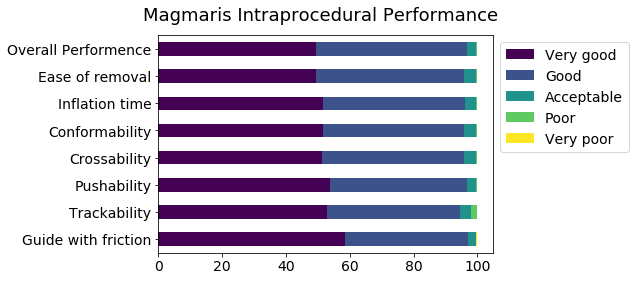

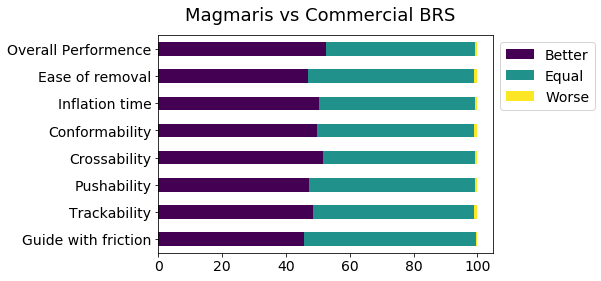

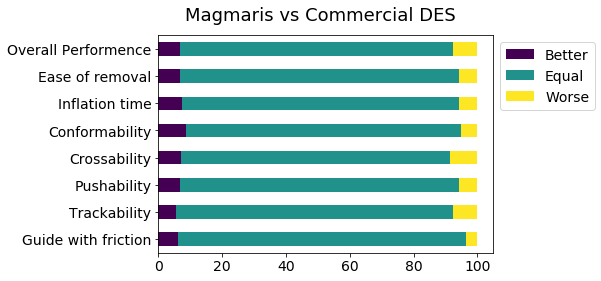

In [8]:
# columns for Magmaris performence
magmaris = ["ddstgwfrictcs","ddsttrackcs","ddstpushcs","ddstcrosscs","ddstconfcs","ddstitmcs","ddsteasecs","ddstprfrmcs"]
# cols for comparison with commercial BRS
brs = ["ddstgwfrictbrs","ddsttrackbrs","ddstpushbrs","ddstcrossbrs","ddstconfbrs","ddstitmbrs","ddsteasebrs","ddstprfrmbrs"]
# cols for comparison with commercial DES
des = ["ddstgwfrictdes","ddsttrackdes","ddstpushdes","ddstcrossdes","ddstconfdes","ddstitmdes","ddsteasedes","ddstprfrmdes"]

# most used comparison devices
print("Most common commercial BRS for comparison:")
print(Counter([str(x).upper() for x in device.ddstcompbrs]).most_common(5))
print("Most common commercial DES for comparison:")
print(Counter([str(x).upper() for x in device.ddstcompdes]).most_common(5))

# get number of available feedbacks
mag_feed = len(device[device[magmaris].isnull().sum(axis=1) == 0])
print("Number of complete feedbacks for Magmaris performence are n = {0} from {1} cases".
      format(mag_feed,magmaris_count))
brs_feed = len(device[device[brs].isnull().sum(axis=1) == 0])
print("Number of complete feedbacks for Magmaris performence vs BRS are n = {0} from {1} cases".
      format(brs_feed,magmaris_count))
des_feed = len(device[device[des].isnull().sum(axis=1) == 0])
print("Number of complete feedbacks for Magmaris performence vs DES are n = {0} from {1} cases".
      format(des_feed,magmaris_count))

# get feedback as numbers
row_names = ["Guide with friction", "Trackability", "Pushability", "Crossability", "Conformability","Inflation time","Ease of removal","Overall Performence"]

# magmaris
feedback = device[device[magmaris].isnull().sum(axis=1) == 0][magmaris].apply(pd.value_counts).T
feedback = feedback[["Very good","Good","Acceptable","Poor","Very poor"]]
feedback = feedback.rename(index = dict(zip(magmaris, row_names)))
feedback = feedback/mag_feed*100
feedback.plot.barh(stacked=True,colormap='viridis').tick_params(labelsize=14)
plt.suptitle('Magmaris Intraprocedural Performance', fontsize = 18)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
   
# magmaris vs BRS
feedback = device[device[brs].isnull().sum(axis=1) == 0][brs].apply(pd.value_counts).T
feedback = feedback[["Better","Equal","Worse"]]
feedback = feedback.rename(index = dict(zip(brs, row_names)))
feedback = feedback/brs_feed*100
feedback.plot.barh(stacked=True,colormap='viridis').tick_params(labelsize=14)
plt.suptitle('Magmaris vs Commercial BRS', fontsize = 18)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)

# magmaris vs DES
feedback = device[device[des].isnull().sum(axis=1) == 0][des].apply(pd.value_counts).T
feedback = feedback[["Better","Equal","Worse"]]
feedback = feedback.rename(index = dict(zip(des, row_names)))
feedback = feedback/des_feed*100
feedback.plot.barh(stacked=True,colormap='viridis').tick_params(labelsize=14)
plt.suptitle('Magmaris vs Commercial DES', fontsize = 18)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)

(A) Magmaris scaffold (B) Magmaris versus commercial BRS (C) Magmaris versus commercial DES. Per physicians' feedback. Magmaris were compared from the physicians to the device which besides Magmaris can be best assessed based on e.g. practical experience. <br> 
(A) Data were available for 1634 from 2116 cases. The overall performance of Magmaris was rated as good or very good in
97% of cases. <br>
(B) Magaris were mainly compared to Absorb scaffold (Abbott
Vascular, Santa Ana, CA, USA). Data from all comparisons were available for 1287 from 2116 cases. Conformability of Magmaris was rated as better in 49% of cases (in 49% equal), the crossability in 57% (in 47% equal), the trackability in 48% (in 50% eual) and the pushability in 47% (in 52% equal). <br>
(C) Magaris were mainly compared to Orsiro scaffold (BIOTRONIK AG, Bülach Switzerland). Data from all comparisons were available for 1596 from 2116 cases. Conformability of Magmaris was rated as better in 8% of cases (in 86% equal), the crossability in 7% (in 84% equal), the trackability in 5% (in 87% equal) and the pushability in 6% (in 87% equal).<br>
Trackability: Ability of a system to be advanced through a curved vessel anatomy. Pushability: Functional parameter to assess the force transfer from the proximal shaft to the very distal tip of the stent system. Crossability: Ability to cross tortuous vessels and narrow lesions. Conformability: Parameter describing the difference in vessel curvature and angulation between pre and post-stent implantation. 

## Primary/secondary endpoint of BIOSOLVE-IV analysis
- TLF
- clinically driven TLR
- TV-MI
- Cardiac Death
- CABG

#### TLF

In [56]:
# patients that died no cardiac death
patient_died = ae_data[(ae_data["aedth"] == "Yes") & (ae_data["aedthcs"] != "Cardiac")]
print("Patients died a non cardiac death, n = {0}".format(len(patient_died.subjid)))

# find patients with TLF
tlf = ae_data[
            ((ae_data["aedth"] == "Yes") & (ae_data["aedthcs"] == "Cardiac")) |
            (ae_data["aecabg"] == "Yes") |
            ((ae_data["aerevasc"] == "Target lesion revascularization") & (ae_data["aerevasccld"] == "Yes")) | 
            (((ae_data["aemiehdef"] == "Yes") | (ae_data["aemiscaidef"] == "Yes")) & (ae_data["aemibytv"] == "Yes"))
        ]

patients_with_tlf = set(tlf["subjid"])
patients_no_tlf = list(set(enrol["subjid"]) - set(patients_with_tlf))


# write external table as y-vector for umcoming tasks
outcome = pd.DataFrame(data=[1] * len(patients_with_tlf) + [0] * len(patients_no_tlf), index=list(patients_with_tlf) + patients_no_tlf, columns = ["TLF"])
outcome.index.name = "subjid"
outcome.to_csv('../data/outcome.csv',sep="\t")

tlf_count = len(tlf["subjid"])
tlf_ratio = round((len(patients_with_tlf)/patient_count)*100,2)

# first statistics about primary endpoint TLF
print("Number of patients with TLF is {0}".format(len(patients_with_tlf)))
print("Number of occured TLF events is {0}".format(tlf_count))
print("{0}% of all patients (n = {1}) have suffered from TLF".format(tlf_ratio, patient_count))

# TLF at 12 months
tlf_12_month= tlf[tlf["aedays"] <= 365]
tlf_12_month_ratio = round((len(set(tlf_12_month.subjid))/patient_count)*100,2)
print("{0}% of all patients (n = {1}) have suffered from TLF within the first 12 month".format(tlf_12_month_ratio, patient_count))



Patients died a non cardiac death, n = 16
Number of patients with TLF is 128
Number of occured TLF events is 144
6.45% of all patients (n = 1985) have suffered from TLF
5.29% of all patients (n = 1985) have suffered from TLF within the first 12 month


#### Composition of TLF

Text(0.5, 0, 'Time to event')

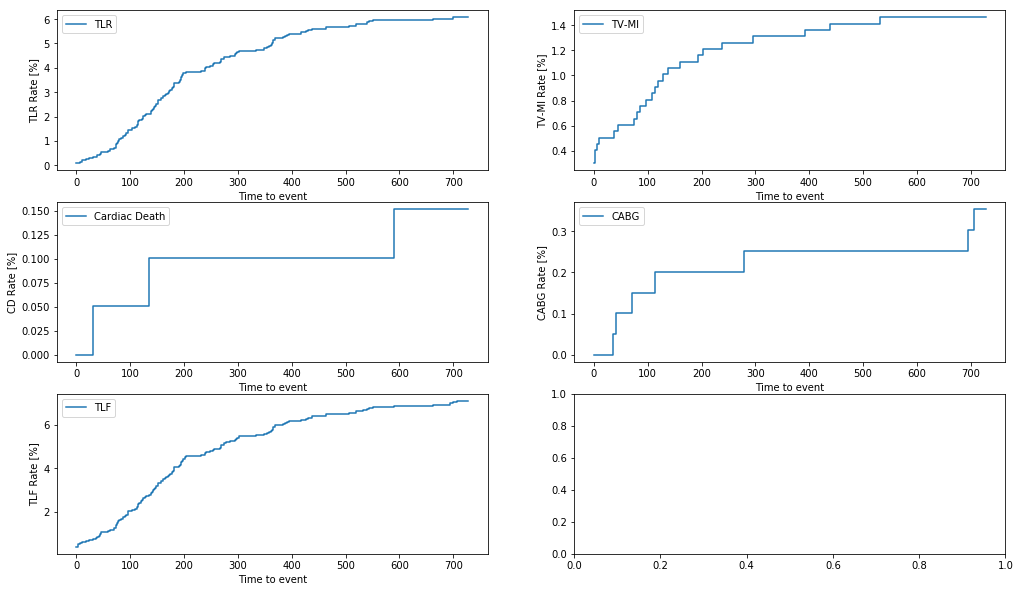

In [175]:
# set up variables
kmf = KaplanMeierFitter()
fig, axes = plt.subplots(3, 2, figsize=(17, 10))

# patients with clinically driven TLR
tlr = ae_data[(ae_data["aerevasc"] == "Target lesion revascularization") & (ae_data["aerevasccld"] == "Yes")]

time = pd.DataFrame(pd.concat([tlr.aedays, patient_died.aedays,], axis=0))
time = pd.concat([time, pd.DataFrame(time.aedays.max(), index=np.arange(patient_count - len(time)), columns=["aedays"])], axis=0)

observation = pd.DataFrame(pd.concat([pd.DataFrame(1, index=np.arange(len(tlr)), columns=["event"]),
                                      pd.DataFrame(0, index=np.arange(len(time)-len(tlr)), columns=["event"])],
                                     axis=0))


kmf.fit(time,event_observed=observation, label="TLR", timeline=range(0,730,2))
kmf.cumulative_density_ = kmf.cumulative_density_*100
kmf.plot_cumulative_density(ax=axes[0][0], ci_show=False)
axes[0][0].set_ylabel('TLR Rate [%]')
axes[0][0].set_xlabel('Time to event')


# patients with target vessel MI
tv_mi = ae_data[((ae_data["aemiehdef"] == "Yes") | (ae_data["aemiscaidef"] == "Yes")) & (ae_data["aemibytv"] == "Yes")]

time = pd.DataFrame(pd.concat([tv_mi.aedays, patient_died.aedays,], axis=0))
time = pd.concat([time, pd.DataFrame(time.aedays.max(), index=np.arange(patient_count - len(time)), columns=["aedays"])], axis=0)

observation = pd.DataFrame(pd.concat([pd.DataFrame(1, index=np.arange(len(tv_mi)), columns=["event"]),
                                      pd.DataFrame(0, index=np.arange(len(time)-len(tv_mi)), columns=["event"])],
                                     axis=0))

kmf.fit(time,event_observed=observation, label="TV-MI", timeline=range(0,730,2))
kmf.cumulative_density_ = kmf.cumulative_density_*100
kmf.plot_cumulative_density(ax=axes[0][1], ci_show=False)
axes[0][1].set_ylabel('TV-MI Rate [%]')
axes[0][1].set_xlabel('Time to event')


# patients with cardiac death
cd = ae_data[(ae_data["aedth"] == "Yes") & (ae_data["aedthcs"] == "Cardiac")]

time = pd.DataFrame(pd.concat([cd.aedays, patient_died.aedays,], axis=0))
time = pd.concat([time, pd.DataFrame(time.aedays.max(), index=np.arange(patient_count - len(time)), columns=["aedays"])], axis=0)

observation = pd.DataFrame(pd.concat([pd.DataFrame(1, index=np.arange(len(cd)), columns=["event"]),
                                      pd.DataFrame(0, index=np.arange(len(time)-len(cd)), columns=["event"])],
                                     axis=0))

kmf.fit(time,event_observed=observation, label="Cardiac Death", timeline=range(0,730,2))
kmf.cumulative_density_ = kmf.cumulative_density_*100
kmf.plot_cumulative_density(ax=axes[1][0], ci_show=False)
axes[1][0].set_ylabel('CD Rate [%]')
axes[1][0].set_xlabel('Time to event')

# patients with CABG
cabg = ae_data[ae_data["aecabg"] == "Yes"]

time = pd.DataFrame(pd.concat([cabg.aedays, patient_died.aedays,], axis=0))
time = pd.concat([time, pd.DataFrame(time.aedays.max(), index=np.arange(patient_count - len(time)), columns=["aedays"])], axis=0)

observation = pd.DataFrame(pd.concat([pd.DataFrame(1, index=np.arange(len(cabg)), columns=["event"]),
                                      pd.DataFrame(0, index=np.arange(len(time)-len(cabg)), columns=["event"])],
                                     axis=0))

kmf.fit(time,event_observed=observation, label="CABG", timeline=range(0,730,2))
kmf.cumulative_density_ = kmf.cumulative_density_*100
kmf.plot_cumulative_density(ax=axes[1][1], ci_show=False)
axes[1][1].set_ylabel('CABG Rate [%]')
axes[1][1].set_xlabel('Time to event')


# patients with TLF
time = pd.DataFrame(pd.concat([tlf.aedays, patient_died.aedays,], axis=0))
time = pd.concat([time, pd.DataFrame(time.aedays.max(), index=np.arange(patient_count - len(time)), columns=["aedays"])], axis=0)

observation = pd.DataFrame(pd.concat([pd.DataFrame(1, index=np.arange(len(tlf)), columns=["event"]),
                                      pd.DataFrame(0, index=np.arange(len(time)-len(tlf)), columns=["event"])],
                                     axis=0))

kmf.fit(time,event_observed=observation, label="TLF", timeline=range(0,730,2))
kmf.cumulative_density_ = kmf.cumulative_density_*100
kmf.plot_cumulative_density(ax=axes[2][0], ci_show=False)
axes[2][0].set_ylabel('TLF Rate [%]')
axes[2][0].set_xlabel('Time to event')


More detailed KMP plots are generated with RScript: code\kaplan_meier_analaysis.R, resulting in the following plots:
![KMP-all](../plots/KMP_all.png)
Data is right cesonred, since we only knew when patients died or a TLF event occured. But it is possible that patients suffer from a TLF event later in time.
The primary endpoint (TLR) have a risk that slightly increases over time, but in a frame, so that there is no need to worry about the long-term effects, since after 2 years it is almost as high as after one year. After one year (365 days) - the primary endpoint of BIOSOLVE-IV - has a risk of 5.84% (the kaplan-meier erstimation). The real percentage of patients suffered from TLF is 5.29% (n = 1985). In contrast, the DES gold standard Orsiro has a TLF rate of 6.7% according to the the results of the BIOSCIENCE RCT study with 2119 patients and the same defined primary endpoint [ https://www.biotronik.com/de-at/products/coronary/orsiro ].

## Ischemic Status
For further information like the definitions of the possible different ischemic status see Baseline characteristics.

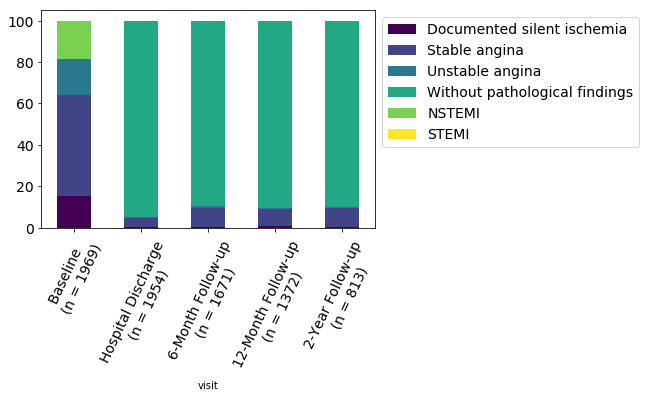

In [7]:
# unify the visit values
ispp['visit'] = ispp['visit'].str.replace(' 2.0','')
status_counts = ispp[ispp[["iscs","visit"]].isnull().sum(axis=1) == 0][["iscs","visit"]].groupby(["visit","iscs"]).size().reset_index(name='count')
status_counts = status_counts.pivot(index="visit", columns="iscs",values="count")
status_counts = status_counts.drop(["Unscheduled Follow-up","3-Year Follow-up"],axis=0)
status_counts = pd.concat([status_counts, pd.DataFrame(0,index=status_counts.index,columns=["NSTEMI","STEMI"])], axis=1)
status_counts.loc["Baseline"] = [len(isbp[isbp["iscs"] == "Documented silent ischemia"]),
                                 len(isbp[isbp["iscs"] == "Stable angina"]),
                                 len(isbp[isbp["iscs"] == "Unstable angina"]),
                                 0,
                                 len(isbp[isbp["isstemi"] == "NSTEMI"]),
                                 len(isbp[isbp["isstemi"] == "STEMI"])
                                 ]

status_counts = status_counts.reindex(["Baseline","Hospital Discharge", "6-Month Follow-up", "12-Month Follow-up","2-Year Follow-up"])
sums = status_counts.sum(axis=1)
status_counts = (status_counts.div(status_counts.sum(axis=1), axis=0))*100
labels = ["Baseline \n (n = {0})".format(int(sums[0])),
          "Hospital Discharge \n (n = {0})".format(int(sums[1])),
                  "6-Month Follow-up \n (n = {0})".format(int(sums[2])),
                  "12-Month Follow-up \n (n = {0})".format(int(sums[3])),
                  "2-Year Follow-up \n (n = {0})".format(int(sums[4]))]

status_counts.plot.bar(stacked=True,colormap='viridis').set_xticklabels(labels ,rotation=65, horizontalalignment="center", fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
